In [1]:
from sentence_transformers import SentenceTransformer


model_path = r"C:\Users\k\Desktop\BaiduSyncdisk\baidu_sync_documents\hf_models\jina-colbert-v2" # 本地模型路径
# model_path = "jinaai/jina-clip-v2" # 远程模型路径

image_urls = ['https://i.ibb.co/nQNGqL0/beach1.jpg', 'https://i.ibb.co/r5w8hG8/beach2.jpg']


c:\Users\k\.conda\envs\SmartImageFinder\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 下载图片
import requests
import os
from tqdm import tqdm

def download_image(url, save_path):
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()
        with open(save_path, 'wb') as file:
            for chunk in tqdm(response.iter_content(chunk_size=8192), 
                             desc=f"Downloading {os.path.basename(url)}", 
                             unit='KB', unit_scale=True):
                file.write(chunk)
        return save_path
    except Exception as e:
        print(f"Error downloading {url}: {e}")
        return None

# 创建保存目录
save_dir = 'images'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 顺序下载图片
for url in image_urls:
    save_path = os.path.join(save_dir, os.path.basename(url))
    result = download_image(url, save_path)
    if result:
        print(f"Downloaded: {result}")
    else:
        print(f"Failed to download: {url}")

Downloaded: images\beach1.jpg


Downloaded: images\beach2.jpg


In [28]:
# 初始化模型
model = SentenceTransformer(
    model_path, trust_remote_code=True
)

C:\Users\k\.cache\huggingface\modules\transformers_modules\jinaai\jina-clip-implementation\51f02de9f2cf8afcd3bac4ce996859ba96f9f8e9\modeling_clip.py:137: UserWarning: Flash attention requires CUDA, disabling
  warnings.warn('Flash attention requires CUDA, disabling')
C:\Users\k\.cache\huggingface\modules\transformers_modules\jinaai\jina-clip-implementation\51f02de9f2cf8afcd3bac4ce996859ba96f9f8e9\modeling_clip.py:172: UserWarning: xFormers requires CUDA, disabling
  warnings.warn('xFormers requires CUDA, disabling')


In [29]:
# 文本语料库
sentences = [
    'غروب جميل على الشاطئ', # 阿拉伯语
    '海滩上美丽的日落', # 中文
    'Un beau coucher de soleil sur la plage', # 法语
    'Ein wunderschöner Sonnenuntergang am Strand', # 德语
    'Ένα όμορφο ηλιοβασίλεμα πάνω από την παραλία', # 希腊语
    'समुद्र तट पर एक खूबसूरत सूर्यास्त', # 印地语
    'Un bellissimo tramonto sulla spiaggia', # 意大利语
    '浜辺に沈む美しい夕日', # 日语
    '해변 위로 아름다운 일몰', # 韩语
]

In [30]:
images = ["images/beach1.jpg", "images/beach2.jpg"] # 图片路径


In [41]:
# 全是中文的文本，但是表达不一样，我要测试下相似度
sentences_zh = [
    '海滩上美丽的日落',
    '海滩上美丽的夕阳',
    '海滩上美丽的黄昏',
    '海滩上美丽的晚霞',
    '海滩上美丽的日出',
    '海滩上美丽的清晨',
    '海滩上美丽的黎明',
    '海滩上美丽的早晨',
]

In [42]:
# sentences_zh转向量
embeddings_zh = model.encode(sentences_zh,normalize_embeddings=True)

In [31]:
text_embeddings = model.encode(sentences, normalize_embeddings=True)

In [ ]:
text_embeddings @ text_embeddings.T


array([[1.0000001 , 0.8099989 , 0.8881056 , 0.86057425, 0.9021691 ,
        0.89576596, 0.90994185, 0.7425193 , 0.92439586],
       [0.8099989 , 1.        , 0.84005266, 0.8298371 , 0.81696945,
        0.87483656, 0.83165747, 0.8370128 , 0.84167856],
       [0.8881056 , 0.84005266, 1.        , 0.949354  , 0.919433  ,
        0.89137626, 0.947208  , 0.75160664, 0.9104937 ],
       [0.86057425, 0.8298371 , 0.949354  , 0.9999998 , 0.9121175 ,
        0.8934012 , 0.92922676, 0.7312234 , 0.90833545],
       [0.9021691 , 0.81696945, 0.919433  , 0.9121175 , 1.0000002 ,
        0.91966015, 0.92292404, 0.74085337, 0.95246744],
       [0.89576596, 0.87483656, 0.89137626, 0.8934012 , 0.91966015,
        1.0000001 , 0.8911455 , 0.8040856 , 0.94267756],
       [0.90994185, 0.83165747, 0.947208  , 0.92922676, 0.92292404,
        0.8911455 , 1.0000004 , 0.7439737 , 0.91365397],
       [0.7425193 , 0.8370128 , 0.75160664, 0.7312234 , 0.74085337,
        0.8040856 , 0.7439737 , 1.        , 0.7783976 ],


In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

def plot_similarity_heatmap(embeddings, labels, title='Embeddings Similarity Heatmap'):
    """
    Calculates and plots the similarity heatmap for given embeddings and labels.

    Args:
        embeddings (np.ndarray): The embeddings to compare.
        labels (list): The labels corresponding to the embeddings for axis ticks.
        title (str): The title for the heatmap plot.
    """


    # 计算文本嵌入之间的相似度矩阵
    if not np.allclose(np.linalg.norm(embeddings, axis=1), 1.0, atol=1e-5):
         print("Warning: Embeddings may not be normalized. Calculating dot product, which equals cosine similarity for normalized vectors.")
    similarity_matrix = embeddings @ embeddings.T

    # 可视化相似度矩阵
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, annot=True, cmap='viridis', fmt=".2f", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout() # 调整布局以防止标签重叠
    plt.show()

# 使用函数绘制多语言文本相似度热力图
plot_similarity_heatmap(text_embeddings, sentences, title='Multi-lingual Text Embeddings Similarity Heatmap')

# 使用函数绘制中文文本相似度热力图
plot_similarity_heatmap(embeddings_zh, sentences_zh, title='Chinese Text Embeddings Similarity Heatmap')

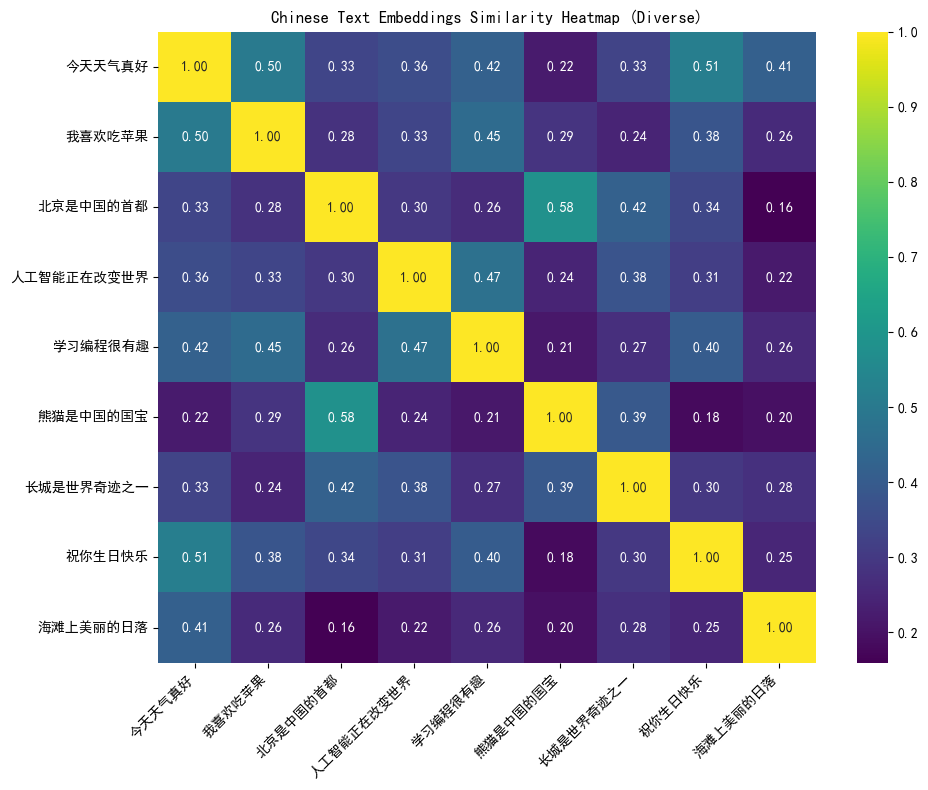

In [50]:
# 替换为更多样化的中文句子
sentences_dif_zh = [
    '今天天气真好',
    '我喜欢吃苹果',
    '北京是中国的首都',
    '人工智能正在改变世界',
    '学习编程很有趣',
    '熊猫是中国的国宝',
    '长城是世界奇迹之一',
    '祝你生日快乐',
    '海滩上美丽的日落',

]

embedding_sentences_dif_zh = model.encode(sentences_dif_zh, normalize_embeddings=True)

# 可视化上面的句子
plot_similarity_heatmap(embedding_sentences_dif_zh, sentences_dif_zh, title='Chinese Text Embeddings Similarity Heatmap (Diverse)')

In [33]:
image_embeddings = model.encode(
    images, normalize_embeddings=True
)  # 也接受 PIL.Image.Image、本地文件名、dataURI


In [34]:
image_embeddings @ image_embeddings.T

array([[1.0000004, 0.9288048],
       [0.9288048, 1.0000001]], dtype=float32)

In [35]:
# 编码查询文本
query = 'beautiful sunset over the beach' # 英语
query_embeddings = model.encode(
    query, normalize_embeddings=True
)
query_embeddings.shape, query_embeddings.dtype, query_embeddings.device



((1024,), dtype('float32'), 'cpu')

In [36]:
query_embeddings @ text_embeddings.T  # 查询文本与文本语料库的相似度

array([0.8217206 , 0.8121675 , 0.8934908 , 0.9126601 , 0.8692525 ,
       0.864749  , 0.8640394 , 0.707512  , 0.89350307], dtype=float32)

In [37]:
query_embeddings @ image_embeddings.T  # 查询文本与图片的相似度

array([0.3303666, 0.3382796], dtype=float32)

In [38]:
text_embeddings @ image_embeddings.T

array([[0.35173795, 0.3347691 ],
       [0.35547468, 0.3601032 ],
       [0.32155246, 0.32127985],
       [0.31721163, 0.32028595],
       [0.33752367, 0.34390154],
       [0.36770427, 0.36575845],
       [0.33243394, 0.3337223 ],
       [0.34468937, 0.32725984],
       [0.35018617, 0.350554  ]], dtype=float32)

Similarity Matrix (Images vs Diverse Chinese Text):
[[0.19007087 0.08128375 0.12451389 0.10962689 0.1273604  0.07421627
  0.12553975 0.0856497  0.3554746 ]
 [0.19794035 0.08500705 0.11489178 0.10045725 0.10805035 0.05454266
  0.11574668 0.10128168 0.3601031 ]]


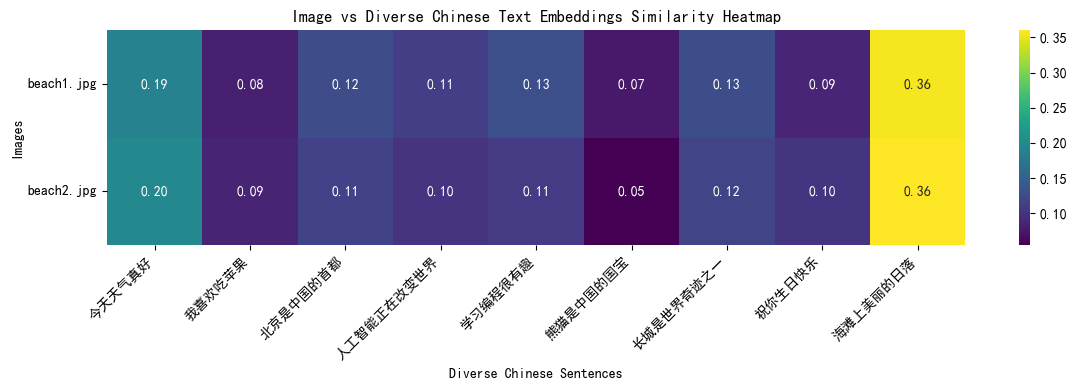

In [ ]:
import seaborn as sns
import os
import numpy as np

import matplotlib.pyplot as plt

# 计算图片嵌入和多样化中文句子嵌入之间的相似度矩阵
# 使用矩阵乘法 (@) 计算点积，因为嵌入向量已经归一化，点积等于余弦相似度
similarity_matrix_img_text = image_embeddings @ embedding_sentences_dif_zh.T

# 打印相似度矩阵
print("相似度矩阵 (图片 vs 多样化中文文本):")
print(similarity_matrix_img_text)

# 可视化相似度矩阵
# 准备热力图的标签
# y轴标签：使用图片的文件名作为标签，更简洁
image_labels = [os.path.basename(img) for img in images]
# x轴标签：使用多样化的中文句子作为标签
sentence_labels = sentences_dif_zh

# 创建图形窗口，设置大小以便更好地显示
plt.figure(figsize=(12, 4))
# 使用 seaborn 生成热力图
sns.heatmap(similarity_matrix_img_text, # 相似度数据
            annot=True,                 # 在单元格中显示数值
            cmap='viridis',             # 设置颜色映射
            fmt=".2f",                  # 数值格式化，保留两位小数
            xticklabels=sentence_labels,# 设置 x 轴刻度标签
            yticklabels=image_labels)   # 设置 y 轴刻度标签
# 设置图表标题
plt.title('图片 vs 多样化中文文本嵌入相似度热力图')
# 设置 x 轴标签
plt.xlabel('多样化中文句子')
# 设置 y 轴标签
plt.ylabel('图片')
# 旋转 x 轴标签以防重叠，并设置对齐方式
plt.xticks(rotation=45, ha='right')
# 设置 y 轴标签不旋转
plt.yticks(rotation=0)
# 自动调整布局，防止标签重叠
plt.tight_layout()
# 显示图表
plt.show()

In [53]:
# 看一下向量的维度

print("文本嵌入维度:", text_embeddings.shape)

文本嵌入维度: (9, 1024)
